<a href="https://colab.research.google.com/github/pripalazzo/Iniciacao_Machine_Learning/blob/main/IGTI_Bootcamp_ML_Desafio_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando o pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando o dataset que será analisado
df_wine = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Questão 1: No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
df_wine.shape

(1599, 12)

In [5]:
# Questão 2: Quantos tipos diferentes de dados existem no dataset do desafio?
# Questão 3: Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Questão 4: Qual é o desvio padrão para a variável "fixed acidity"?
# Questão 5: Qual é a mediana para a variável "residual sugar"?
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Questão 6: Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:
corr_ph = df_wine['fixed acidity'].corr(df_wine['pH'])
print(corr_ph)

-0.6829781945685316


In [8]:
# Questão 7: Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:
corr_quality = df_wine['quality'].corr(df_wine['alcohol'])
print(corr_quality)

0.4761663240011358


In [9]:
# Questão 8: Quantas instâncias existem para a qualidade do vinho igual a 5?
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
# Qestão 9: Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

# Importando o módulo MinMaxScaler do sklearn
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(df_wine)

#converte o array em dataframe pandas
scaled_df = pd.DataFrame(scaled)

scaled_df.describe()



,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Questão 10: Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN? 

In [11]:
# Indicando os dados de entrada e os target
X = df_wine.iloc[:, :-1].values  #dados de entrada
y = df_wine.iloc[:, 11].values  # target  

# função que realiza a divisão do dataset
from sklearn.model_selection import train_test_split  

# divide 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

In [12]:
# realiza o processo de normalização dos dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors = 5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [14]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [15]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  1   0   0   1   0   0]
 [  0   1  14   5   1   0]
 [  0   0 147  55   5   0]
 [  0   1  72 101  21   0]
 [  0   1   9  24  18   0]
 [  0   0   0   0   3   0]]
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.65       207
           6       0.54      0.52      0.53       195
           7       0.38      0.35      0.36        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.35      0.38       480
weighted avg       0.54      0.56      0.54       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


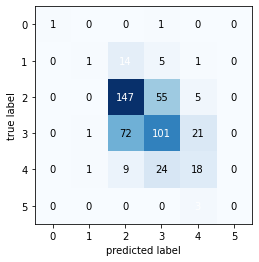

In [16]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

- Questão 11: Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?

In [17]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação

# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

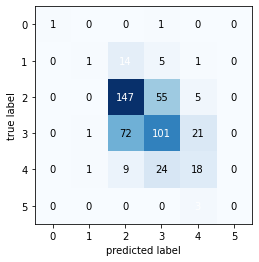

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.27      0.14      0.19        21
           5       0.68      0.70      0.69       207
           6       0.63      0.58      0.60       195
           7       0.42      0.56      0.48        52
           8       0.14      0.33      0.20         3

    accuracy                           0.60       480
   macro avg       0.36      0.38      0.36       480
weighted avg       0.61      0.60      0.60       480



In [18]:
matriz_confusao_clf = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))

- Questão 12: Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?

In [19]:
from sklearn.ensemble import RandomForestClassifier # importa o classificador árvore de decisão

# Cria o objeto de classificação através do 
clf_floresta = RandomForestClassifier(max_depth = 10, random_state = 1)

# Realiza o treinamento do classificador
clf_floresta = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_floresta.predict(X_test)

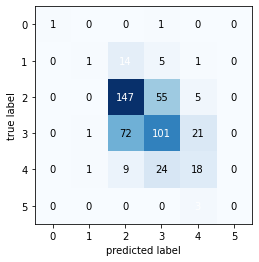

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.69      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.65       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
matriz_confusao_clf = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))

- Questão 13: Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?

In [21]:
from sklearn.svm import SVC

In [22]:
#cria o objeto SVM
clf_svm = SVC(gamma = 'auto',kernel = 'rbf')

#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

SVC(gamma='auto')

In [23]:
#Realiza a previsão de classificaçao 
y_pred = clf_svm.predict(X_test)

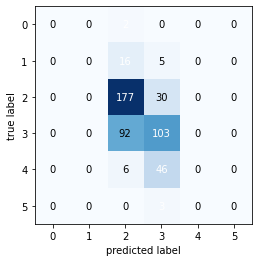

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.60      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.58       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.48      0.58      0.52       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Avaliando o modelo 
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))

- Questão 14: Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?


In [25]:
# Importando a biblioteca
from sklearn.neural_network import MLPClassifier

In [26]:
#define a configuração da rede

clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes = (5, 5), random_state=1) 
#rede com 5 camadas escondidas com 5 neurônios cada

In [27]:
#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1)

In [28]:
#realiza a previsão
y_pred = clf_mlp.predict(X_test)

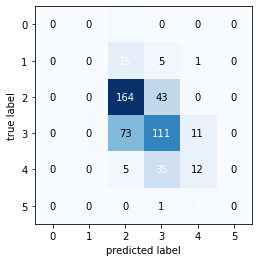

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.79      0.70       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.55      0.60      0.57       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#Avaliando o modelo 
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))

- Questão 15: Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?

In [30]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
df_wine.loc[(df_wine['quality'] <= 5),'binary_quality '] = 0
df_wine.loc[(df_wine['quality'] > 5),'binary_quality '] = 1

In [39]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [33]:
# Indicando os dados de entrada e os target
X = df_wine.iloc[:, :-2].values  #dados de entrada
y = df_wine.iloc[:, 12].values  # target  


In [34]:
# divide 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

In [35]:
print(X_test)

[[ 8.8   0.41  0.64 ...  3.54  0.66 10.5 ]
 [ 8.7   0.63  0.28 ...  3.26  0.63 10.2 ]
 [10.4   0.34  0.58 ...  3.19  0.7  11.3 ]
 ...
 [ 8.2   0.73  0.21 ...  3.2   0.52  9.5 ]
 [ 7.5   0.57  0.02 ...  3.36  0.62 10.8 ]
 [ 7.6   0.5   0.29 ...  3.32  0.62 11.5 ]]


In [36]:
# realiza o processo de normalização dos dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Cria o objeto de classificação através do 
clf_floresta = RandomForestClassifier(max_depth = 10, random_state = 1)

# Realiza o treinamento do classificador
clf_floresta = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_floresta.predict(X_test)

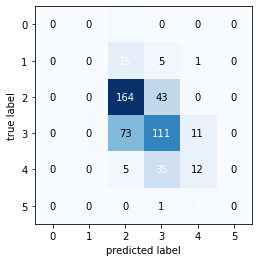

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       230
         1.0       0.82      0.80      0.81       250

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [38]:
matriz_confusao_clf = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

print(classification_report(y_test, y_pred))